In [42]:
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import graphviz

In [2]:
data=pd.ExcelFile('C:/Users/Admin/Downloads/46K29.1_Group1.xlsx')
df1= pd.read_excel(data, 'Customer')
df2= pd.read_excel(data, 'FactInternetSales')
df3= pd.read_excel(data, 'SaleTerritory')
data2= pd.read_excel(data, 'Product')

In [3]:
df2.UnitPrice.describe()

count    60396.000000
mean       486.055746
std        928.482070
min          2.290000
25%          7.950000
50%         29.990000
75%        539.990000
max       3578.270000
Name: UnitPrice, dtype: float64

In [4]:
df4=pd.merge(df1, df2, how='inner', on='CustomerKey', sort=False,
             suffixes=('_x', '_y'), copy=True, indicator=False)
df4

,CustomerKey,BirthDate,YearlyIncome2,YearlyIncome,Class_YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,...,UnitPrice,ExtendedAmount,ProductStandardCost,TotalProductCost,SalesAmount,TaxAmt,Freight,OrderDate,DueDate,ShipDate
0,11000,1971,90000,90000,High,2,0,Bachelors,Professional,1,...,3399.9900,3399.9900,1912.1544,1912.1544,3399.9900,271.9992,84.9998,2017-01-19,2017-01-31,2017-01-26 00:00:00
1,11000,1971,90000,90000,High,2,0,Bachelors,Professional,1,...,2319.9900,2319.9900,1265.6195,1265.6195,2319.9900,185.5992,57.9998,2019-01-18,2019-01-30,2019-01-25 00:00:00
2,11000,1971,90000,90000,High,2,0,Bachelors,Professional,1,...,21.9800,21.9800,8.2205,8.2205,21.9800,1.7584,0.5495,2019-01-18,2019-01-30,2019-01-25 00:00:00
3,11000,1971,90000,90000,High,2,0,Bachelors,Professional,1,...,2384.0700,2384.0700,1481.9379,1481.9379,2384.0700,190.7256,59.6018,2019-05-03,2019-05-15,2019-05-10 00:00:00
4,11000,1971,90000,90000,High,2,0,Bachelors,Professional,1,...,28.9900,28.9900,10.8423,10.8423,28.9900,2.3192,0.7248,2019-05-03,2019-05-15,2019-05-10 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60388,29480,1977,30000,30000,Low,3,0,Graduate Degree,Clerical,1,...,34.9900,34.9900,13.0863,13.0863,34.9900,2.7992,0.8748,2019-07-17,2019-07-29,2019-07-24 00:00:00
60389,29480,1977,30000,30000,Low,3,0,Graduate Degree,Clerical,1,...,8.9900,8.9900,6.9223,6.9223,8.9900,0.7192,0.2248,2019-07-17,2019-07-29,2019-07-24 00:00:00
60390,29481,1965,30000,30000,Low,3,0,Graduate Degree,Clerical,0,...,3374.9900,3374.9900,1898.0944,1898.0944,3374.9900,269.9992,84.3748,2017-08-13,2017-08-25,2017-08-20 00:00:00
60391,29482,1964,30000,30000,Low,3,0,Bachelors,Clerical,1,...,2049.0982,2049.0982,1105.8100,1105.8100,2049.0982,163.9279,51.2275,2018-09-18,2018-09-30,2018-09-25 00:00:00


In [5]:
df5=pd.merge(df4, df3, how='inner', on='SalesTerritoryKey', sort=False,
             suffixes=('_x', '_y'), copy=True, indicator=False)
df5

,CustomerKey,BirthDate,YearlyIncome2,YearlyIncome,Class_YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,EnglishOccupation,HouseOwnerFlag,...,SalesAmount,TaxAmt,Freight,OrderDate,DueDate,ShipDate,SalesTerritoryAlternateKey,SalesTerritoryRegion,SalesTerritoryCountry,SalesTerritoryGroup
0,11000,1971,90000,90000,High,2,0,Bachelors,Professional,1,...,3399.9900,271.9992,84.9998,2017-01-19,2017-01-31,2017-01-26 00:00:00,9,Australia,Australia,Pacific
1,11000,1971,90000,90000,High,2,0,Bachelors,Professional,1,...,2319.9900,185.5992,57.9998,2019-01-18,2019-01-30,2019-01-25 00:00:00,9,Australia,Australia,Pacific
2,11000,1971,90000,90000,High,2,0,Bachelors,Professional,1,...,21.9800,1.7584,0.5495,2019-01-18,2019-01-30,2019-01-25 00:00:00,9,Australia,Australia,Pacific
3,11000,1971,90000,90000,High,2,0,Bachelors,Professional,1,...,2384.0700,190.7256,59.6018,2019-05-03,2019-05-15,2019-05-10 00:00:00,9,Australia,Australia,Pacific
4,11000,1971,90000,90000,High,2,0,Bachelors,Professional,1,...,28.9900,2.3192,0.7248,2019-05-03,2019-05-15,2019-05-10 00:00:00,9,Australia,Australia,Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60388,21249,1982,40000,40000,Medium,0,0,High School,Skilled Manual,0,...,4.9900,0.3992,0.1248,2019-11-26,2019-12-08,2019-12-03 00:00:00,2,Northeast,United States,North America
60389,21249,1982,40000,40000,Medium,0,0,High School,Skilled Manual,0,...,54.9900,4.3992,1.3748,2019-11-26,2019-12-08,2019-12-03 00:00:00,2,Northeast,United States,North America
60390,27040,1962,20000,20000,Low,2,1,Partial High School,Clerical,1,...,4.9900,0.3992,0.1248,2019-02-02,2019-02-14,2019-02-09 00:00:00,2,Northeast,United States,North America
60391,27040,1962,20000,20000,Low,2,1,Partial High School,Clerical,1,...,2.2900,0.1832,0.0573,2019-02-02,2019-02-14,2019-02-09 00:00:00,2,Northeast,United States,North America


In [6]:
df6=pd.merge(df5, data2, how='inner', on='ProductKey', sort=False,
             suffixes=('_x', '_y'), copy=True, indicator=False)

In [7]:
df6['Month']=df6['OrderDate'].dt.month

In [23]:
df=df6[['Class_YearlyIncome','EnglishOccupation','Class_Age','SalesTerritoryCountry','UnitPrice','ProductLine','ModelName']]

In [24]:
df.isnull().sum()

Class_YearlyIncome       0
EnglishOccupation        0
Class_Age                0
SalesTerritoryCountry    0
UnitPrice                0
ProductLine              0
ModelName                0
dtype: int64

In [25]:
df.Class_YearlyIncome=df.Class_YearlyIncome.map({'Low':1,'Medium':2,'High':3})

C:\Users\Admin\AppData\Local\Temp\ipykernel_13216\564567540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Class_YearlyIncome=df.Class_YearlyIncome.map({'Low':1,'Medium':2,'High':3})


In [26]:
df.SalesTerritoryCountry.unique()

array(['Australia', 'United States', 'Canada', 'Germany',
       'United Kingdom', 'France'], dtype=object)

In [27]:
df.EnglishOccupation=df.EnglishOccupation.map({'Professional':1,'Clerical':2,'Skilled Manual':3,'Management':4,'Manual':5})

C:\Users\Admin\AppData\Local\Temp\ipykernel_13216\3081165481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.EnglishOccupation=df.EnglishOccupation.map({'Professional':1,'Clerical':2,'Skilled Manual':3,'Management':4,'Manual':5})


In [28]:
df.Class_Age=df.Class_Age.map({'<=40':1,'41-50':2,'>50':3})

C:\Users\Admin\AppData\Local\Temp\ipykernel_13216\3782362894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Class_Age=df.Class_Age.map({'<=40':1,'41-50':2,'>50':3})


In [29]:
df.SalesTerritoryCountry=df.SalesTerritoryCountry.map({'Australia':1,'United States':2,'Canada':3,
                                                      'Germany':4,'United Kingdom':5,'France':6})

C:\Users\Admin\AppData\Local\Temp\ipykernel_13216\2379357321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.SalesTerritoryCountry=df.SalesTerritoryCountry.map({'Australia':1,'United States':2,'Canada':3,


In [30]:
df.ProductLine.unique()

array(['M ', 'T ', 'S ', 'R '], dtype=object)

In [31]:
df.ProductLine=df.ProductLine.map({'S ':1,'M ':2,'R ':3,'T ':4})

C:\Users\Admin\AppData\Local\Temp\ipykernel_13216\3489540073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ProductLine=df.ProductLine.map({'S ':1,'M ':2,'R ':3,'T ':4})


In [30]:
df7=df.iloc[:,:7]
df7

,Class_YearlyIncome,EnglishOccupation,Class_Age,SalesTerritoryCountry,UnitPrice,Month,ProductLine
0,3,1,2,1,3399.99,1,2
1,2,1,3,1,3399.99,12,2
2,1,2,3,1,3399.99,2,2
3,2,3,3,1,3399.99,2,2
4,2,3,3,1,3399.99,3,2
...,...,...,...,...,...,...,...
60388,1,2,2,6,782.99,6,3
60389,1,2,1,6,782.99,10,3
60390,2,1,2,6,782.99,11,3
60391,3,1,3,6,782.99,12,3


In [18]:
from sklearn.preprocessing import StandardScaler   #for scaling data
from sklearn.cluster import KMeans #for K-mean Cluster

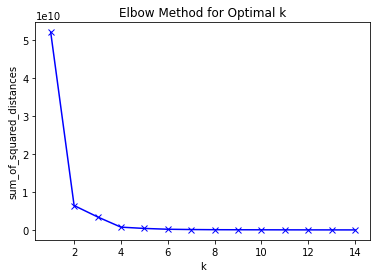

In [31]:
#Sử dụng phương pháp Elbow(khuỷu tay) để tìm ra số cụm tốt nhất
sum_of_squared_distances=[]
K= range(1,15)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(df7)
    sum_of_squared_distances.append(km.inertia_)
#Plotting the Elbow Curve by k(number of cluters)
plt.plot(K,sum_of_squared_distances,"bx-")
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method for Optimal k')
plt.show()

In [40]:
df.dtypes

Class_YearlyIncome         int64
EnglishOccupation          int64
Class_Age                  int64
SalesTerritoryCountry      int64
UnitPrice                float64
Month                      int64
ProductLine                int64
ModelName                 object
dtype: object

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:6], df.iloc[:,6],
                                                    test_size=0.2)
print ("Training size: %d" %len(y_train))
print ("Test size : %d" %len(y_test))

Training size: 48314
Test size : 12079


In [33]:
from sklearn import tree
decision_tree=tree.DecisionTreeClassifier(criterion='entropy',splitter='best')
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [34]:
feature=df.iloc[:,0:6]
target=df['ModelName'].unique()

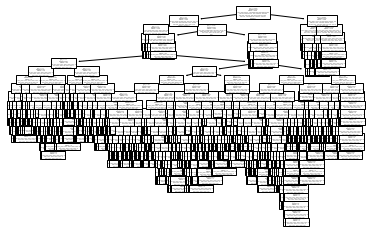

In [44]:
tree.plot_tree(decision_tree)
plt.show()

In [35]:
from sklearn import datasets
from IPython.display import Image
import pydotplus
dot_df=tree.export_graphviz(decision_tree, out_file=None,
                            feature_names=None, class_names=target)

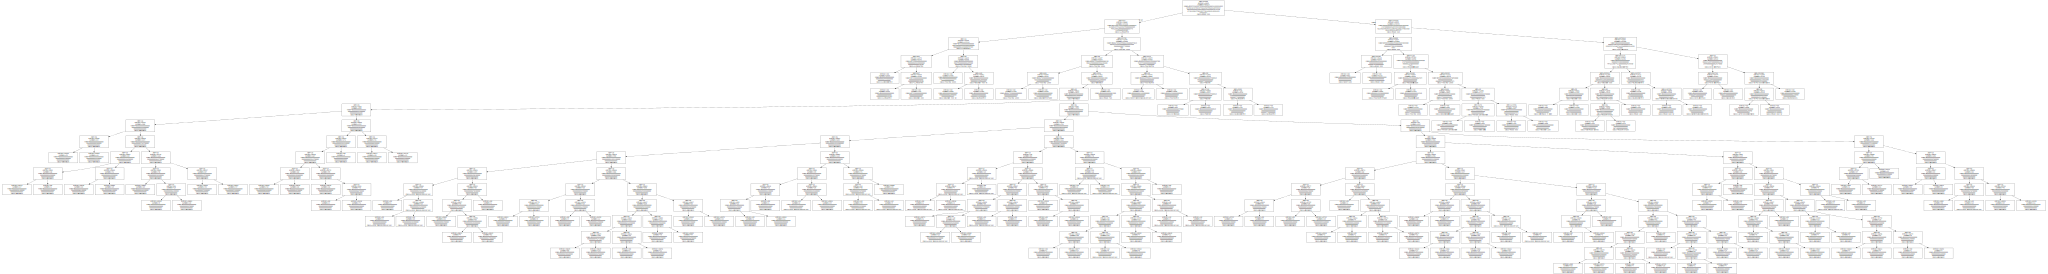

In [36]:
graph = graphviz.Source(dot_df, format="png")
graph

In [37]:
graph.render("decision_tree_graphviz")
'decision_tree_graphivz.png'

'decision_tree_graphivz.png'

In [39]:
X_new=[[1,3,1,3,120,1],[3,1,2,1,2000,3]]
X_new=pd.DataFrame(X_new, columns=['Class_YearlyIncome','EnglishOccupation','Class_Age',
                                   'SalesTerritoryCountry','UnitPrice','ProductLine'])
predictprodline=decision_tree.predict(X_new)
predictprodline=pd.DataFrame(predictprodline, columns=['ModelName'])
df2=pd.concat([X_new, predictprodline], axis=1)
df2

,Class_YearlyIncome,EnglishOccupation,Class_Age,SalesTerritoryCountry,UnitPrice,ProductLine,ModelName
0,1,3,1,3,120,1,Hitch Rack - 4-Bike
1,3,1,2,1,2000,3,Road-250


# Các tham số đánh giá mô hình cây quyết định

In [44]:
feature_imp=pd.Series(decision_tree.feature_importances_,index=df.columns.values[0:6])
feature_imp

Class_YearlyIncome       0.000155
EnglishOccupation        0.000148
Class_Age                0.000130
SalesTerritoryCountry    0.000248
UnitPrice                0.813807
ProductLine              0.185514
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.show(close=None, block=None)>

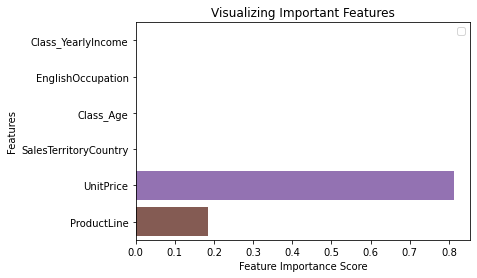

In [45]:
sns.barplot(x=feature_imp,y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.legend()
plt.show

In [40]:
predictions=decision_tree.predict(X_test)
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

0.9901481910754202
[[ 49   0   0 ...   0   0   0]
 [  0 186   0 ...   0   0   0]
 [  0   0 106 ...   0   0   0]
 ...
 [  0   0   0 ... 107   0   0]
 [  0   0   0 ...   0 840   0]
 [  0   0   0 ...   0   0 222]]
                             precision    recall  f1-score   support

     All-Purpose Bike Stand       1.00      1.00      1.00        49
                  Bike Wash       1.00      1.00      1.00       186
               Classic Vest       1.00      1.00      1.00       106
                Cycling Cap       1.00      1.00      1.00       440
      Fender Set - Mountain       1.00      1.00      1.00       422
           HL Mountain Tire       1.00      1.00      1.00       304
               HL Road Tire       1.00      1.00      1.00       176
         Half-Finger Gloves       1.00      1.00      1.00       264
        Hitch Rack - 4-Bike       1.00      1.00      1.00        64
             Hydration Pack       1.00      1.00      1.00       141
           LL Mountain Tire  